In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix.csv')

In [144]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [145]:
#no of columns and rows in the dataset
netflix.shape

(8807, 12)

In [146]:
# gen info of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [147]:
# count of data unavailaible in the dataset
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [148]:
# name of all the columns in the dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [149]:
#count no of movies and tvshows in the dataset 
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [150]:
# top 2 countries producing maximum no of TV shows and movies in recent years on netlfix
netflix.loc[ :, ['type', 'country']].value_counts().head(4)

type     country       
Movie    United States     2058
         India              893
TV Show  United States      760
         United Kingdom     213
dtype: int64

In [151]:
# top 5 countries producing maximum no of Movies in recent years on netlfix
netflix.loc[ netflix['type'] == 'Movie', ['type', 'country']].value_counts().head(5)

type   country       
Movie  United States     2058
       India              893
       United Kingdom     206
       Canada             122
       Spain               97
dtype: int64

In [ ]:
 # count of movies and tv shows released yearly
filt = netflix['release_year'].value_counts().head(5)
filt

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64

In [152]:
#no of TV shows having different no of seasons
seasons = netflix['duration'].str.contains('Seasons', na=False)
netflix.loc[seasons, ['type', 'duration']].value_counts()

type     duration  
TV Show  2 Seasons     425
         3 Seasons     199
         4 Seasons      95
         5 Seasons      65
         6 Seasons      33
         7 Seasons      23
         8 Seasons      17
         9 Seasons       9
         10 Seasons      7
         13 Seasons      3
         11 Seasons      2
         12 Seasons      2
         15 Seasons      2
         17 Seasons      1
dtype: int64

In [153]:
# details of movies and tv shows released in year 2021
netflix.loc[ netflix['release_year'] == 2021, ['type', 'title', 'cast', 'release_year', 'duration', 'description']]

,type,title,cast,release_year,duration,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,1 Season,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,2021,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,2 Seasons,In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021,1 Season,The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...
1468,Movie,What Happened to Mr. Cha?,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",2021,102 min,"With the peak of his career long behind him, a..."
1551,TV Show,Hilda,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...",2021,2 Seasons,"Fearless, free-spirited Hilda finds new friend..."
1696,TV Show,Polly Pocket,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...",2021,2 Seasons,After uncovering a magical locket that allows ...
2920,TV Show,Love Is Blind,"Nick Lachey, Vanessa Lachey",2021,1 Season,Nick and Vanessa Lachey host this social exper...


In [154]:
#list down the name of comedy inclusive movies including their ratings and directors
Comedy_shows = netflix['listed_in'].str.contains('Comedies', na=False)
netflix.loc[ (Comedy_shows) & (netflix['type'] == 'Movie'), ['type', 'title', 'director', 'rating', 'listed_in']]

,type,title,director,rating,listed_in
9,Movie,The Starling,Theodore Melfi,PG-13,"Comedies, Dramas"
13,Movie,Confessions of an Invisible Girl,Bruno Garotti,TV-PG,"Children & Family Movies, Comedies"
22,Movie,Avvai Shanmughi,K.S. Ravikumar,TV-PG,"Comedies, International Movies"
24,Movie,Jeans,S. Shankar,TV-14,"Comedies, International Movies, Romantic Movies"
26,Movie,Minsara Kanavu,Rajiv Menon,TV-PG,"Comedies, International Movies, Music & Musicals"
...,...,...,...,...,...
8791,Movie,Young Adult,Jason Reitman,R,"Comedies, Dramas, Independent Movies"
8793,Movie,"Yours, Mine and Ours",Raja Gosnell,PG,"Children & Family Movies, Comedies"
8798,Movie,Zed Plus,Chandra Prakash Dwivedi,TV-MA,"Comedies, Dramas, International Movies"
8804,Movie,Zombieland,Ruben Fleischer,R,"Comedies, Horror Movies"


In [155]:
#top 5 directors who produced max no of movies/tv shows
netflix['director'].value_counts().head(5)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

In [157]:
#change date format to yyyy-mm-dd format
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [162]:
netflix.loc[0, 'date_added'].day_name()

'Saturday'

In [172]:
netflix['year'] = netflix['date_added'].dt.year
netflix['month'] = netflix['date_added'].dt.month
netflix['date'] = netflix['date_added'].dt.date
netflix['day'] = netflix['date_added'].dt.day

In [173]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,date,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,2021-09-25,25.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2021-09-24,24.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,2021-09-24,24.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,2021-09-24,24.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2021-09-24,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,2019-11-20,20.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,2019-07-01,1.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,2019-11-01,1.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,2020-01-11,11.0


**Data Visualization**

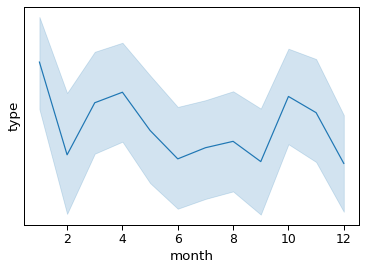

In [161]:
sns.lineplot(x=netflix['month'], y=netflix['type'])
plt.show()           

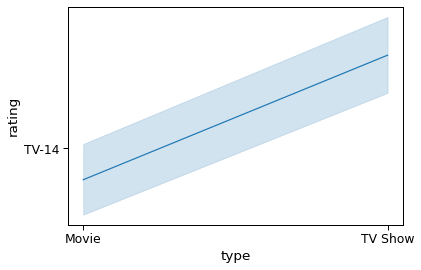

In [163]:
sns.lineplot(x=netflix['type'], y=netflix['rating'])
plt.show()

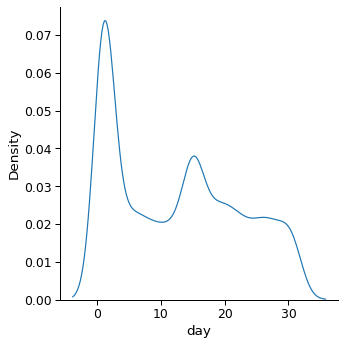

In [174]:
sns.displot(data=netflix, x='day', kind="kde")
plt.show()

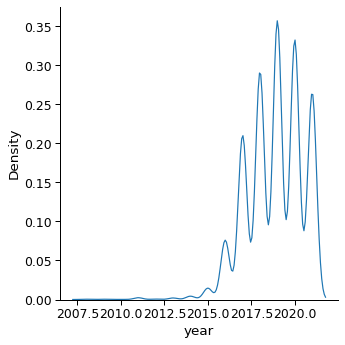

In [166]:
sns.displot(data=netflix, x='year', kind="kde")
plt.show()

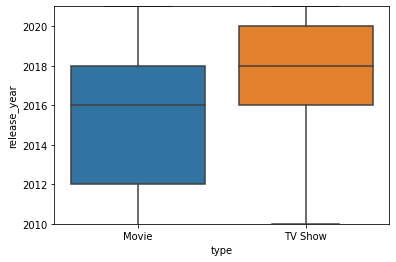

In [ ]:
#boxplot distribution of movies and TV shows over a decade
fig = plt.figure()
sns.boxplot(data=netflix, x='type', y='release_year')
plt.ylim(2010,2021)
fig.show()

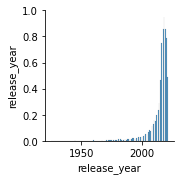

In [ ]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(netflix)
plt.show()

From this data analysis of the 'netflix' dataset, we get to know

-The country which produced the highest no of movies and tv shows over a decade is United States
-Highest no of tv shows were of 2 seasons. 
-TV shows with less no of seasons are more frequently produced.
-The year when max no of movies/tv shows were produced was 2018.
-List of comedy or similar movies with their release_year, cast, director, ratings etc.
-Top 5 directors producing max no of movies/tv shows.
-Most no of tv shows/movies has added their dates between 1st to 10th of month.
-The distribution of movie/tv shows with ratings.
-The distribution of movie/tv shows with month.



